In [2]:
#import packages
import pandas as pd
import numpy as np
from numpy import mean, std, cov 
from numpy.random import seed, randn
import random as rd
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot

from __future__ import division 
import sys
import scipy
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
#load dataset
study2 = pd.read_csv(r'WTP_master_study2_4PCA.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)


study2['PCA_PC1'] = pca_df['PC1']
print(study2)

                       dem_ID  AQ  BISBAS_BIS  BISBAS_BASRR  BISBAS_FS  \
0    56259489ed6e5a0005c80fde  37          26            20         11   
1    58060d08b869700001d70b8c  22          16            20         11   
2    5914b7b50a4b9d0001add64f  24           0             0          0   
3    5a78e410ae9a0b0001a97274  20          19            15          7   
4    5adbc051f6b58c0001fa3bbe  22          26            18          9   
5    5af529ca222e4d0001878444  16          28            18         11   
6    5b48f2d0ff7497000125165e  23          28            19         11   
7    5bb0c112a1c73d0001b9ce9e  23          28            20         14   
8    5beaed3f0af61d0001968d9a  30           0             0          0   
9    5bfadc1846911f0001d7d1eb  34          27            12          8   
10   5c1a8a5e2a85450001a878cd  26          18            10         10   
11   5c3cd553c21f060001c3e571  20          26            17          8   
12   5c4e7b34620ba700010c5dc6  30     

In [4]:
#extract column of participant ids and drop from dataframe
ids = study2['dem_ID']
study2 = study2.drop(['dem_ID'], axis=1)
#store id column in variable called "measures"
measures = study2.columns

In [5]:
#add id column as the index in the dataframe
data = pd.DataFrame(data=study2)
data.index = ids
print(data)

                          AQ  BISBAS_BIS  BISBAS_BASRR  BISBAS_FS  \
dem_ID                                                              
56259489ed6e5a0005c80fde  37          26            20         11   
58060d08b869700001d70b8c  22          16            20         11   
5914b7b50a4b9d0001add64f  24           0             0          0   
5a78e410ae9a0b0001a97274  20          19            15          7   
5adbc051f6b58c0001fa3bbe  22          26            18          9   
5af529ca222e4d0001878444  16          28            18         11   
5b48f2d0ff7497000125165e  23          28            19         11   
5bb0c112a1c73d0001b9ce9e  23          28            20         14   
5beaed3f0af61d0001968d9a  30           0             0          0   
5bfadc1846911f0001d7d1eb  34          27            12          8   
5c1a8a5e2a85450001a878cd  26          18            10         10   
5c3cd553c21f060001c3e571  20          26            17          8   
5c4e7b34620ba700010c5dc6  30      

In [6]:
#transpose dataframe so that the rows represent measures and columns represent each participant
data = data.transpose()
print(data)

dem_ID                  56259489ed6e5a0005c80fde  58060d08b869700001d70b8c  \
AQ                                     37.000000                 22.000000   
BISBAS_BIS                             26.000000                 16.000000   
BISBAS_BASRR                           20.000000                 20.000000   
BISBAS_FS                              11.000000                 11.000000   
BISBAS_BASD                            15.000000                 12.000000   
BRCS                                   18.000000                 17.000000   
CESD                                   28.000000                 14.000000   
COVIDexperience_score                  13.000000                 13.000000   
COVIDimpacts_score                     39.000000                 40.000000   
COVIDpsychstress_score                  3.000000                  5.000000   
COVIDthreat_score                      24.000000                 20.000000   
IRI_FS                                 26.000000                

In [7]:
#return 1st five values of dataframe
print(data.head())
#return dimensions of our data matrix: 28 measures by 226 participants
print(data.shape)

dem_ID        56259489ed6e5a0005c80fde  58060d08b869700001d70b8c  \
AQ                                37.0                      22.0   
BISBAS_BIS                        26.0                      16.0   
BISBAS_BASRR                      20.0                      20.0   
BISBAS_FS                         11.0                      11.0   
BISBAS_BASD                       15.0                      12.0   

dem_ID        5914b7b50a4b9d0001add64f  5a78e410ae9a0b0001a97274  \
AQ                                24.0                      20.0   
BISBAS_BIS                         0.0                      19.0   
BISBAS_BASRR                       0.0                      15.0   
BISBAS_FS                          0.0                       7.0   
BISBAS_BASD                        0.0                      10.0   

dem_ID        5adbc051f6b58c0001fa3bbe  5af529ca222e4d0001878444  \
AQ                                22.0                      16.0   
BISBAS_BIS                        26.0        

In [8]:
#STEP 1: before PCA, scale and center the data
#Standardizarion ensures the range of the continous inital variables each equally contributes to the analysis
scaled_data = preprocessing.scale(data.T)
# print(scaled_data)
#alternative function: StandardScaler().fit_transform(data.T)
type(scaled_data)
scaled_df = pd.DataFrame(data= scaled_data)
# print(scaled_df)
scaled_df.insert(0,'id',ids)
print(scaled_df)

                           id         0         1         2         3  \
0    56259489ed6e5a0005c80fde  2.266832  0.952761  0.884660  0.523068   
1    58060d08b869700001d70b8c  0.071243 -0.023322  0.884660  0.523068   
2    5914b7b50a4b9d0001add64f  0.363988 -1.585055 -1.663882 -1.537704   
3    5a78e410ae9a0b0001a97274 -0.221502  0.269503  0.247524 -0.226304   
4    5adbc051f6b58c0001fa3bbe  0.071243  0.952761  0.629806  0.148382   
5    5af529ca222e4d0001878444 -0.806992  1.147977  0.629806  0.523068   
6    5b48f2d0ff7497000125165e  0.217616  1.147977  0.757233  0.523068   
7    5bb0c112a1c73d0001b9ce9e  0.217616  1.147977  0.884660  1.085097   
8    5beaed3f0af61d0001968d9a  1.242224 -1.585055 -1.663882 -1.537704   
9    5bfadc1846911f0001d7d1eb  1.827714  1.050369 -0.134757 -0.038961   
10   5c1a8a5e2a85450001a878cd  0.656734  0.171894 -0.389611  0.335725   
11   5c3cd553c21f060001c3e571 -0.221502  0.952761  0.502379 -0.038961   
12   5c4e7b34620ba700010c5dc6  1.242224  0.659936  

In [9]:
#in sklearn, variation is calculated as:
#(measurements - mean)^2 / number of measurements

In [10]:

#create PCA object
#sklearn uses objects that can be trained using one dataseet and applied to another dataset
pca = PCA()

#call fit method on scaled data, where all PCA math occurs (i.e. calculate loading scores and the variation each principal component accounts for)
pca.fit(scaled_data)


#generate coordinates for PCA graph based on loading scores and scaled data
pca_data = pca.transform(scaled_data)
print(pca_data)

[[ 9.96220182e-02 -1.82954102e+00 -9.59411242e-02 ... -2.17944247e-02
  -7.04089814e-02 -2.71501325e-16]
 [-1.12091893e+00 -1.34133490e+00 -4.71346044e-01 ... -2.81888586e-01
   3.88322850e-01  1.72679260e-16]
 [-4.16712516e-01  2.94863185e+00 -3.90099297e+00 ...  5.41355379e-01
  -8.19751546e-02 -1.07967687e-15]
 ...
 [-2.93733232e+00 -1.17150558e+00 -2.71908763e+00 ... -6.34453099e-01
   3.67665650e-02  6.84587891e-17]
 [ 1.51786789e-01 -1.25893345e+00  2.86808479e+00 ... -5.62861370e-02
   1.60098001e-01  2.76163957e-16]
 [-6.47701504e-01 -1.53732320e+00 -4.23690556e-01 ... -8.11426156e-02
  -2.21971676e-01  1.08959023e-16]]


In [11]:
#drawing a graph
#create a screeplot to see how many principal components should go into the final plot


In [12]:
#calculate the percentage of variation that each principal component accounts for
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

type(per_var)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

In [13]:
#now create labels for scree plot, 1 label per principal component; PC1, PC2, etc
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]


In [14]:
percs = pd.DataFrame(per_var)
print(per_var)

[23.8 14.6 11.8  7.6  5.9  4.6  4.   3.6  3.1  2.8  2.6  2.5  2.3  2.
  1.7  1.4  1.2  1.2  0.8  0.7  0.6  0.5  0.4  0.2  0. ]


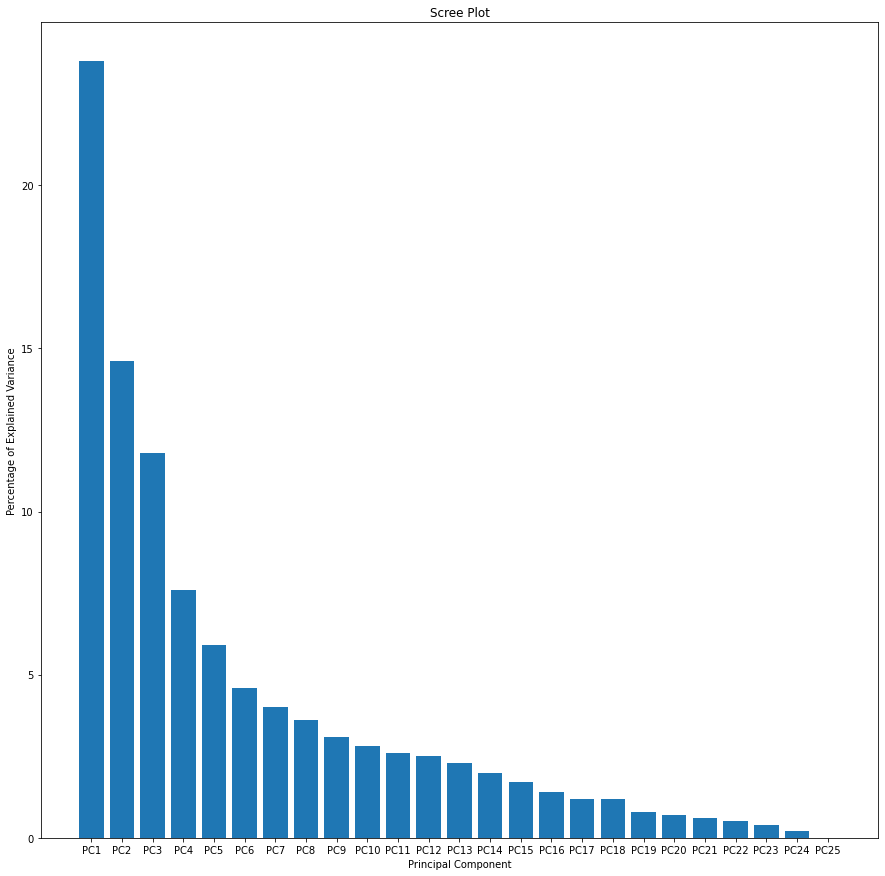

In [15]:
#use matplotlib to create a bar plot
plt.figure(figsize=(15,15))
plt.bar(x=range(1,len(per_var)+1), height= per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [16]:
#almost all of the variation is along PC1, so a 2d graph using PC1 and PC2 should do a good job representing the original data

In [17]:
#draw a PCA plot
#first, put the new coordinates created by pca.transform(scaled.data)
#into a matrix where the rows have the participant ids and the columns have PC labels
pca_df = pd.DataFrame(pca_data, index=ids,columns=labels)
print(pca_df)
pca_df.to_csv('WTP_PCA_allsubjects.csv')

                               PC1       PC2       PC3       PC4       PC5  \
dem_ID                                                                       
56259489ed6e5a0005c80fde  0.099622 -1.829541 -0.095941  2.157480  1.102818   
58060d08b869700001d70b8c -1.120919 -1.341335 -0.471346  0.534124  1.398571   
5914b7b50a4b9d0001add64f -0.416713  2.948632 -3.900993 -0.803177  1.035747   
5a78e410ae9a0b0001a97274 -4.111079 -0.708400 -0.573627  1.058372  1.446783   
5adbc051f6b58c0001fa3bbe  3.986466 -1.272327 -0.115363  0.840912  1.243362   
5af529ca222e4d0001878444  2.478501 -0.932746 -0.173258  1.071143 -0.684167   
5b48f2d0ff7497000125165e  0.302636 -1.591466 -0.702234  1.146271 -1.178431   
5bb0c112a1c73d0001b9ce9e -0.104920 -1.867816  2.923368 -1.002291  0.141396   
5beaed3f0af61d0001968d9a  5.288937  3.741331  1.314197 -1.071734  1.280469   
5bfadc1846911f0001d7d1eb  5.800599 -0.047686  0.080456 -0.649744  0.713871   
5c1a8a5e2a85450001a878cd  2.192084  0.191919 -1.788038 -0.566758

wtp232                    0.604535  0.090240 -0.081143 -0.221972  1.089590e-16  


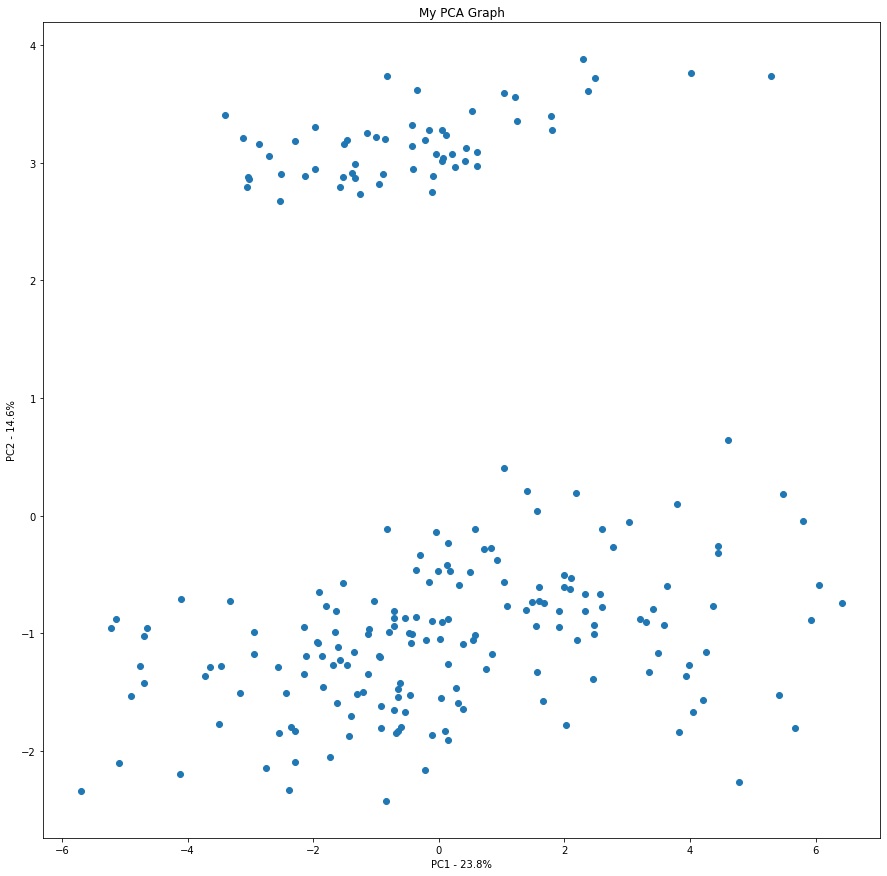

In [18]:
#Visualize the distribution of the samples
#draw a scatter plot
plt.figure(figsize=(15,15))
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
#add sample names to graph
# for sample in pca_df.index:
#     plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

In [19]:
# from pca import pca

# # Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
# model = pca(n_components=0.95)

# # Or reduce the data towards 2 PCs
# model = pca(n_components=2)

# # Fit transform
# results = model.fit_transform(scaled_data)

# # Plot explained variance
# fig, ax = model.plot()

# # Scatter first 2 PCs
# fig, ax = model.scatter()

# # Make biplot with the number of features
# fig, ax = model.biplot(n_feat=4)

In [20]:
#PC1
#The next step in our interpretation is to understand how our variables contribute to each of the principal components, and this is revealed by the loadings.
#look at the loading scores for PC1 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis

#loading scores- can be understood as the weights for each original variable when calculating the principal component

#  Positive loadings indicate a variable and a principal component are positively correlated: an increase in one results in an increase in the other. 
# Negative loadings indicate a negative correlation. 
#Large (either positive or negative) loadings indicate that a variable has a strong effect on that principal component.


In [21]:
#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[0], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_10_measures = sorted_loading_scores[0:10].index.values

AQ                        0.264640
BISBAS_BIS                0.122777
BISBAS_BASRR              0.026130
BISBAS_FS                 0.019822
BISBAS_BASD              -0.010302
BRCS                     -0.233256
CESD                      0.347230
COVIDexperience_score    -0.002371
COVIDimpacts_score        0.081529
COVIDpsychstress_score   -0.067196
COVIDthreat_score         0.086641
IRI_FS                    0.047748
IRI_EC                   -0.089238
IRI_PD                    0.171510
IRI_PT                   -0.150345
LSAS                      0.248660
LSAS_FEAR                 0.241893
LSAS_AVOIDANCE            0.229145
MSPSS                    -0.268785
MSSSF                     0.166391
RSE                      -0.331086
STAI                      0.317260
UCLA_loneliness           0.334156
UM_AFFILIATION           -0.219195
UM_INTIMACY              -0.122612
dtype: float64


In [22]:
#print top 10 measures and their corresponding loading scores
print(loading_scores[top_10_measures])
PC1 = pd.DataFrame(loading_scores[top_10_measures]).transpose()
print(PC1)

CESD               0.347230
UCLA_loneliness    0.334156
RSE               -0.331086
STAI               0.317260
MSPSS             -0.268785
AQ                 0.264640
LSAS               0.248660
LSAS_FEAR          0.241893
BRCS              -0.233256
LSAS_AVOIDANCE     0.229145
dtype: float64
      CESD  UCLA_loneliness       RSE     STAI     MSPSS       AQ     LSAS  \
0  0.34723         0.334156 -0.331086  0.31726 -0.268785  0.26464  0.24866   

   LSAS_FEAR      BRCS  LSAS_AVOIDANCE  
0   0.241893 -0.233256        0.229145  


In [23]:
#PC2
#look at the loading scores for PC2 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis
#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[1], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_10_measures = sorted_loading_scores[0:10].index.values

AQ                        0.055306
BISBAS_BIS               -0.464904
BISBAS_BASRR             -0.508596
BISBAS_FS                -0.482212
BISBAS_BASD              -0.481803
BRCS                     -0.064166
CESD                     -0.046229
COVIDexperience_score     0.013561
COVIDimpacts_score        0.042608
COVIDpsychstress_score   -0.010477
COVIDthreat_score         0.027395
IRI_FS                   -0.043877
IRI_EC                   -0.032776
IRI_PD                    0.092662
IRI_PT                   -0.075253
LSAS                      0.085035
LSAS_FEAR                 0.104161
LSAS_AVOIDANCE            0.058646
MSPSS                     0.062418
MSSSF                     0.009922
RSE                       0.010472
STAI                      0.015974
UCLA_loneliness          -0.068646
UM_AFFILIATION           -0.021054
UM_INTIMACY               0.008753
dtype: float64


In [24]:
#print top 10 measures and their corresponding loading scores for PC 2
print(loading_scores[top_10_measures])
PC2 = pd.DataFrame(loading_scores[top_10_measures]).transpose()
print(PC2.columns)

BISBAS_BASRR      -0.508596
BISBAS_FS         -0.482212
BISBAS_BASD       -0.481803
BISBAS_BIS        -0.464904
LSAS_FEAR          0.104161
IRI_PD             0.092662
LSAS               0.085035
IRI_PT            -0.075253
UCLA_loneliness   -0.068646
BRCS              -0.064166
dtype: float64
Index(['BISBAS_BASRR', 'BISBAS_FS', 'BISBAS_BASD', 'BISBAS_BIS', 'LSAS_FEAR',
       'IRI_PD', 'LSAS', 'IRI_PT', 'UCLA_loneliness', 'BRCS'],
      dtype='object')


In [25]:
#PC3
#look at the loading scores for PC2 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis
#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[2], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_10_measures = sorted_loading_scores[0:10].index.values

AQ                       -0.089675
BISBAS_BIS                0.031931
BISBAS_BASRR              0.035180
BISBAS_FS                 0.043163
BISBAS_BASD               0.018772
BRCS                      0.136400
CESD                      0.048442
COVIDexperience_score     0.100174
COVIDimpacts_score        0.169413
COVIDpsychstress_score    0.171384
COVIDthreat_score         0.210672
IRI_FS                    0.234280
IRI_EC                    0.366025
IRI_PD                    0.159342
IRI_PT                    0.293257
LSAS                      0.310504
LSAS_FEAR                 0.306558
LSAS_AVOIDANCE            0.281991
MSPSS                     0.199070
MSSSF                     0.135090
RSE                      -0.005233
STAI                      0.038219
UCLA_loneliness          -0.129484
UM_AFFILIATION            0.271412
UM_INTIMACY               0.366178
dtype: float64


In [26]:
#print top 10 measures and their corresponding loading scores for PC 2
print(loading_scores[top_10_measures])
PC3 = pd.DataFrame(loading_scores[top_10_measures]).transpose()
print(PC3.columns)

UM_INTIMACY          0.366178
IRI_EC               0.366025
LSAS                 0.310504
LSAS_FEAR            0.306558
IRI_PT               0.293257
LSAS_AVOIDANCE       0.281991
UM_AFFILIATION       0.271412
IRI_FS               0.234280
COVIDthreat_score    0.210672
MSPSS                0.199070
dtype: float64
Index(['UM_INTIMACY', 'IRI_EC', 'LSAS', 'LSAS_FEAR', 'IRI_PT',
       'LSAS_AVOIDANCE', 'UM_AFFILIATION', 'IRI_FS', 'COVIDthreat_score',
       'MSPSS'],
      dtype='object')


In [27]:
###################################################################################################################

In [28]:
######################## GLM using PCA results################################

In [29]:
#import excel file containing data summary for GLM
import os
data = pd.read_csv(r'/Volumes/GoogleDrive/My Drive/WTP_data/WTP_LONG_ALL.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)


data = data.loc[(data['balanced'] == 1)]
data= data.reset_index(drop=True)


In [30]:
#extract top 10 PC1 measures in the format for the GLM formula (i.e. measure 1 + measure2 + measure3+ ...)
col = ''
for i in data.loc[:,PC1.columns]:
    col = str(i) + ' + ' + col 
PC1_col = col[:-2]   

In [31]:
#run GLM - PC1
formula = 'exp_chosen ~' + PC1_col
PC1_model = sm.formula.glm(formula = formula, data=data).fit()
print(PC1_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             exp_chosen   No. Observations:                11299
Model:                            GLM   Df Residuals:                    11289
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.24379
Method:                          IRLS   Log-Likelihood:                -8053.6
Date:                Tue, 26 Jul 2022   Deviance:                       2752.2
Time:                        17:35:37   Pearson chi2:                 2.75e+03
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02542
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6580      0.081     

In [32]:
############################################################################################

In [33]:
#PC2

In [34]:
#extract top 10 PC2 measures in the format for the GLM formula (i.e. measure 1 + measure2 + measure3+ ...)
col = ''
for i in data.loc[:,PC2.columns]:
    col = str(i) + ' + ' + col 
PC2_col = col[:-2]   

In [35]:
#run GLM - PC2
formula = 'exp_chosen ~' + PC2_col
PC2_model = sm.formula.glm(formula = formula, data=data).fit()
print(PC2_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             exp_chosen   No. Observations:                11299
Model:                            GLM   Df Residuals:                    11288
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.24472
Method:                          IRLS   Log-Likelihood:                -8074.5
Date:                Tue, 26 Jul 2022   Deviance:                       2762.4
Time:                        17:35:37   Pearson chi2:                 2.76e+03
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02172
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6244      0.049     

In [36]:
############################################################################################

In [37]:
#PC3

In [38]:
#extract top 10 PC2 measures in the format for the GLM formula (i.e. measure 1 + measure2 + measure3+ ...)
col = ''
for i in data.loc[:,PC3.columns]:
    col = str(i) + ' + ' + col 
PC3_col = col[:-2]   

In [41]:
# #run GLM - PC3
# formula = 'exp_chosen ~ PC1 ' + PC3_col
# PC3_model = sm.formula.glm(formula = formula, data=data).fit()
# print(PC3_model.summary())

In [ ]:
############################################################################################

In [44]:
data_wPCA = data = pd.read_csv(r'/Volumes/GoogleDrive/My Drive/WTP_data/PCA/WTP_LONG_wPCA.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(data_wPCA.head())

                      subid  balanced  subtrial  social_money  \
0  56259489ed6e5a0005c80fde         1         1          0.05   
1  56259489ed6e5a0005c80fde         1         2          0.03   
2  56259489ed6e5a0005c80fde         1         3          0.01   
3  56259489ed6e5a0005c80fde         1         4          0.01   
4  56259489ed6e5a0005c80fde         1         5          0.03   

   nonsocial_money  exp_chosen  decision_price  reaction_time  response  AQ  \
0             0.02         0.0            0.02         2.0925       2.0  37   
1             0.04         0.0            0.04         1.8986       1.0  37   
2             0.03         0.0            0.03         2.2145       2.0  37   
3             0.05         1.0            0.01         1.4479       2.0  37   
4             0.02         0.0            0.02         1.3662       2.0  37   

      MSPSS  IRI_FS  IRI_EC  IRI_PD  IRI_PT  BRCS  LSAS  LSAS_FEAR  \
0  6.666667      26      20      14      15    18    12         

In [48]:
#GLM w/ PC1 individual scores

formula = 'exp_chosen ~ PC1'
PC1_model = sm.formula.glm(formula = formula, data=data_wPCA).fit()
print(PC1_model.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:             exp_chosen   No. Observations:                11349
Model:                            GLM   Df Residuals:                    11347
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.24504
Method:                          IRLS   Log-Likelihood:                -8122.4
Date:                Tue, 26 Jul 2022   Deviance:                       2780.5
Time:                        18:11:24   Pearson chi2:                 2.78e+03
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01946
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5134      0.005    110.493      0.0

In [49]:
#GLM w/ PC2 individual scores

formula = 'exp_chosen ~ PC2'
PC2_model = sm.formula.glm(formula = formula, data=data_wPCA).fit()
print(PC2_model.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:             exp_chosen   No. Observations:                11349
Model:                            GLM   Df Residuals:                    11347
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.24972
Method:                          IRLS   Log-Likelihood:                -8229.7
Date:                Tue, 26 Jul 2022   Deviance:                       2833.6
Time:                        18:11:24   Pearson chi2:                 2.83e+03
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0005579
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5135      0.005    109.462      0.0

In [50]:
#GLM w/ PC3 individual scores

formula = 'exp_chosen ~ PC3'
PC3_model = sm.formula.glm(formula = formula, data=data_wPCA).fit()
print(PC3_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             exp_chosen   No. Observations:                11349
Model:                            GLM   Df Residuals:                    11347
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.24875
Method:                          IRLS   Log-Likelihood:                -8207.6
Date:                Tue, 26 Jul 2022   Deviance:                       2822.6
Time:                        18:11:25   Pearson chi2:                 2.82e+03
No. Iterations:                     3   Pseudo R-squ. (CS):           0.004457
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5132      0.005    109.613      0.0